<a href="https://colab.research.google.com/github/Anubhab-Deb/Machine_Learning_Assignment_2/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  #importing numpy
import pandas as pd #importing pandas
import matplotlib.pyplot as plt #importing matplotlib
import seaborn as sns #importing seaborn for diagrams
from sklearn.model_selection import train_test_split  #importing scikit for train/test split
from sklearn.preprocessing import StandardScaler, LabelEncoder #importing data preprocessing tools from scikit
from sklearn.linear_model import LinearRegression #importing Linear Regression from scikit
from sklearn.metrics import mean_squared_error, r2_score  #importing RMSE and regression score output tool from scikit

In [ ]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"  #Load dataset directly from web
data = pd.read_csv(url)  #import dataset
display(data.head()) #show first 5 data from dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.info() #show data info(column, types, nulls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True) #Dropping missing values

In [ ]:
data.info() #re-checking data for missing values

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
x=data.drop(['median_house_value'], axis=1) #x is part of dataset without this specific column
y=data['median_house_value']  #y is dataset with this specific column

In [ ]:
le = LabelEncoder() #implements label encoder
x["ocean_proximity"] = le.fit_transform(x["ocean_proximity"]) #makes text data into integer for this column

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2) #implements test/train data split; test data being 20% of full data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>]], dtype=object)

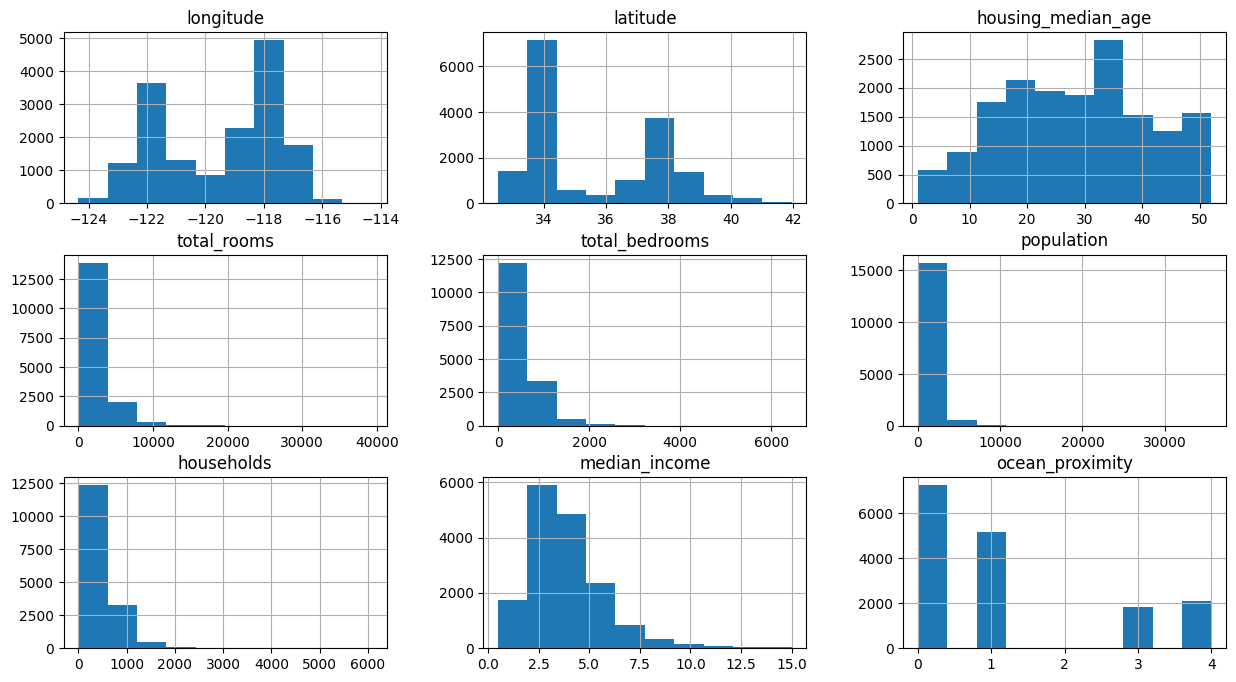

In [ ]:
x_train.hist(figsize=(15,8)) #histogram of x part of train data

In [ ]:
x_train.corr() #shows co-relation matrix of x part of train data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
longitude,1.000000,-0.924470,-0.111821,0.048278,0.072142,0.103280,0.058664,-0.019441,-0.293956
latitude,-0.924470,1.000000,0.014091,-0.037723,-0.067411,-0.110201,-0.071712,-0.076721,0.204529
housing_median_age,-0.111821,0.014091,1.000000,-0.363504,-0.325814,-0.297593,-0.308111,-0.116228,0.120062
total_rooms,0.048278,-0.037723,-0.363504,1.000000,0.931068,0.860980,0.921140,0.197915,-0.018550
total_bedrooms,0.072142,-0.067411,-0.325814,0.931068,1.000000,0.879690,0.980200,-0.007368,-0.019420
population,0.103280,-0.110201,-0.297593,0.860980,0.879690,1.000000,0.908348,0.008386,-0.072660
households,0.058664,-0.071712,-0.308111,0.921140,0.980200,0.908348,1.000000,0.014562,-0.022636
median_income,-0.019441,-0.076721,-0.116228,0.197915,-0.007368,0.008386,0.014562,1.000000,-0.006850
ocean_proximity,-0.293956,0.204529,0.120062,-0.018550,-0.019420,-0.072660,-0.022636,-0.006850,1.000000


<Axes: >

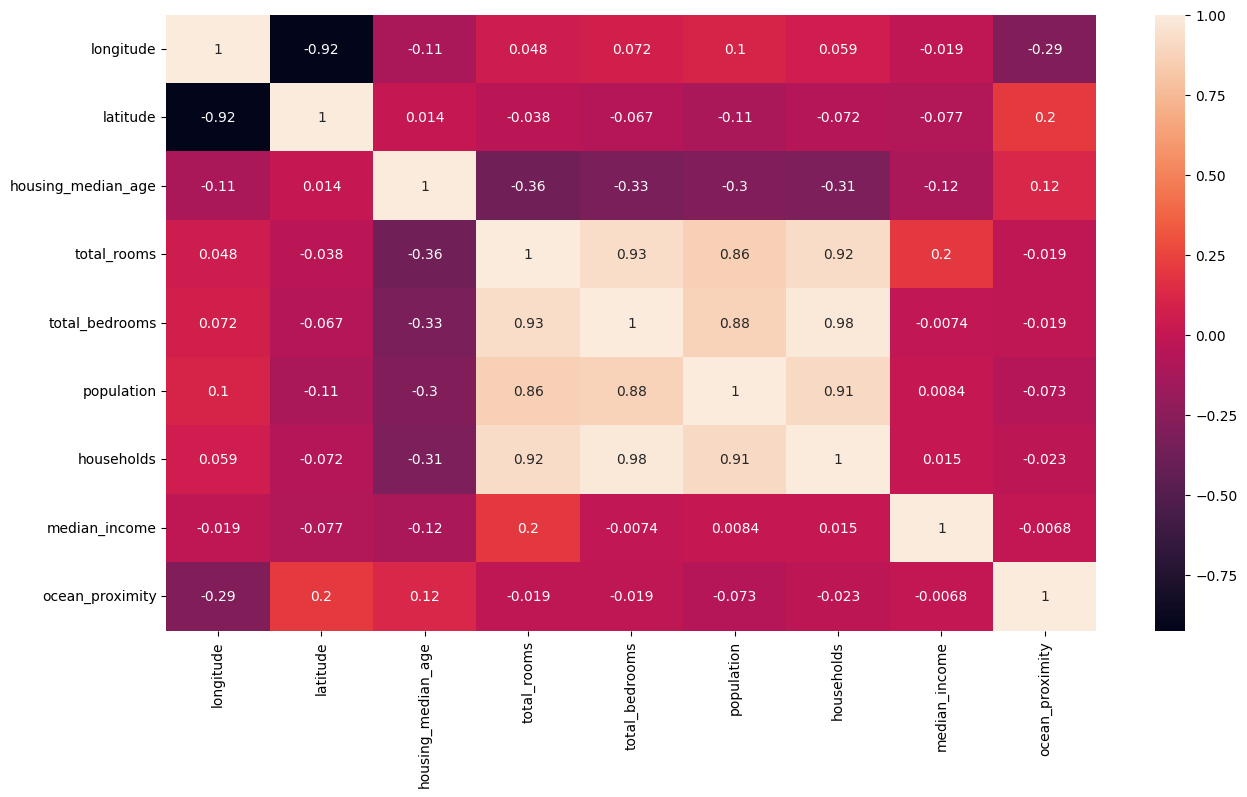

In [ ]:
plt.figure(figsize=(15,8))  #defines figure size
sns.heatmap(x_train.corr(), annot=True) #implements heatmap diagram of corelation matrix of x part of train data

In [ ]:
train_data=x_train.join(y_train)  #joins x part of train data with y part of train data to form train data

In [ ]:
train_data  #shows full train data; first 10 columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12950,-121.28,38.71,8.0,4053.0,912.0,2033.0,897.0,2.8973,1,117100.0
8020,-118.11,33.84,37.0,1588.0,272.0,692.0,245.0,4.8594,0,220300.0
18124,-122.02,37.33,25.0,3823.0,584.0,1689.0,571.0,7.3693,0,373600.0
2294,-119.74,36.80,18.0,10862.0,2401.0,5466.0,2209.0,2.4678,1,74300.0
11375,-117.96,33.68,18.0,2594.0,539.0,817.0,485.0,2.3674,0,219200.0
...,...,...,...,...,...,...,...,...,...,...
10320,-117.78,33.85,16.0,3781.0,504.0,1665.0,499.0,7.2554,0,335600.0
14881,-117.06,32.63,37.0,1326.0,234.0,612.0,240.0,4.1250,4,160200.0
7910,-118.09,33.88,27.0,3119.0,635.0,1887.0,567.0,3.8654,0,195300.0
20090,-120.22,38.05,14.0,3803.0,689.0,1129.0,477.0,2.7188,1,137000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

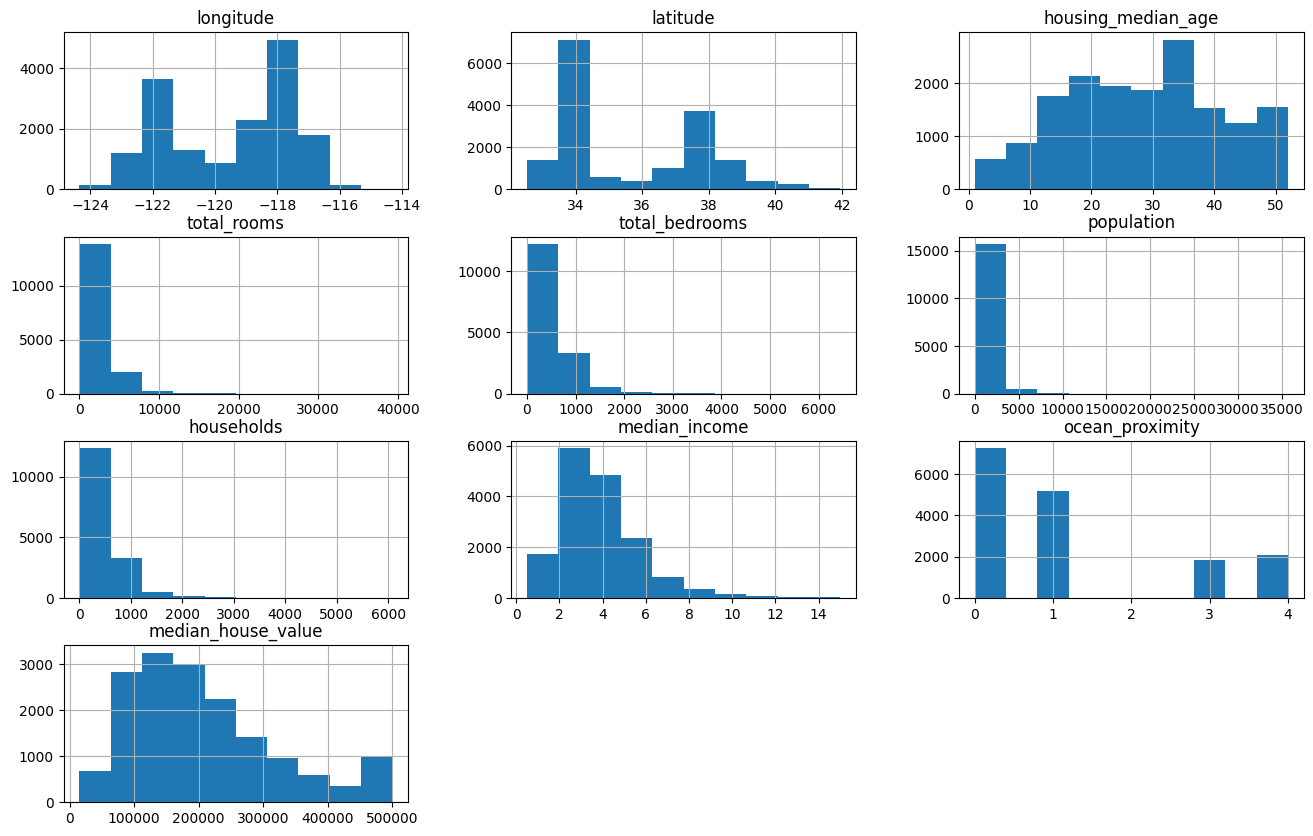

In [ ]:
train_data.hist(figsize=(16,10))  #histogram of train data

In [ ]:
train_data.corr() #train data corelation matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924470,-0.111821,0.048278,0.072142,0.103280,0.058664,-0.019441,-0.293956,-0.046271
latitude,-0.924470,1.000000,0.014091,-0.037723,-0.067411,-0.110201,-0.071712,-0.076721,0.204529,-0.144199
housing_median_age,-0.111821,0.014091,1.000000,-0.363504,-0.325814,-0.297593,-0.308111,-0.116228,0.120062,0.111010
total_rooms,0.048278,-0.037723,-0.363504,1.000000,0.931068,0.860980,0.921140,0.197915,-0.018550,0.131249
total_bedrooms,0.072142,-0.067411,-0.325814,0.931068,1.000000,0.879690,0.980200,-0.007368,-0.019420,0.047551
population,0.103280,-0.110201,-0.297593,0.860980,0.879690,1.000000,0.908348,0.008386,-0.072660,-0.024365
households,0.058664,-0.071712,-0.308111,0.921140,0.980200,0.908348,1.000000,0.014562,-0.022636,0.063868
median_income,-0.019441,-0.076721,-0.116228,0.197915,-0.007368,0.008386,0.014562,1.000000,-0.006850,0.689947
ocean_proximity,-0.293956,0.204529,0.120062,-0.018550,-0.019420,-0.072660,-0.022636,-0.006850,1.000000,0.085216
median_house_value,-0.046271,-0.144199,0.111010,0.131249,0.047551,-0.024365,0.063868,0.689947,0.085216,1.000000


<Axes: >

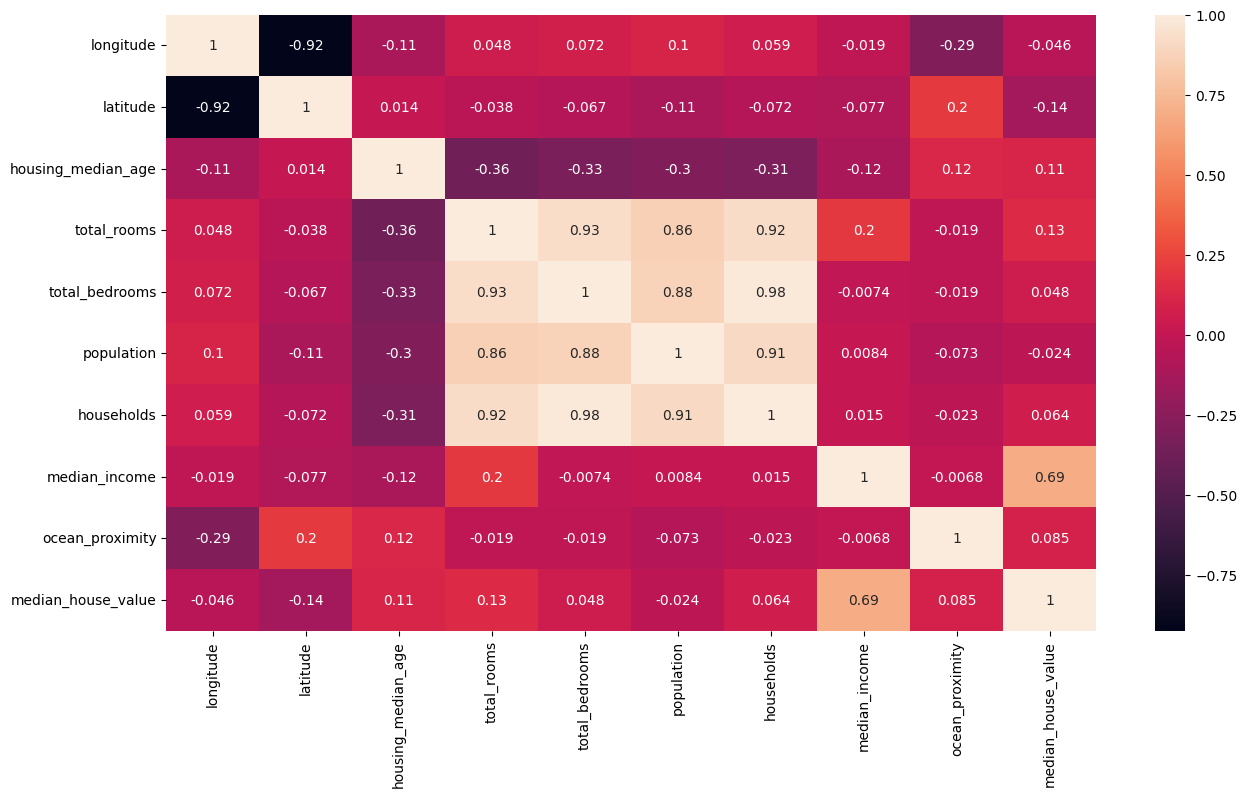

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)  #shows heatmap diagram of train data

In [ ]:
scaler = StandardScaler() #scikit tool for regularization
x_train_scaled = scaler.fit_transform(x_train)  #regularization done for x part of train data
x_test_scaled = scaler.transform(x_test)  #regularization done for x part of test data using mean and s.d. from train data

In [ ]:
lr=LinearRegression() #linear regression implementation
lr.fit(x_train_scaled, y_train) #train it on scaled data for best-fit

LinearRegression()

In [ ]:
lr.score(x_train_scaled, y_train) #accuracy on train data

0.6399553354088598

In [ ]:
lr.score(x_test_scaled, y_test) #accuracy on test data

0.6241521072100868

In [ ]:
predict=lr.predict(x_test_scaled) #using trained Linear Regression model to predict target value
rmse=np.sqrt(mean_squared_error(y_test, predict)) #to find Root Mean Squared Error

In [ ]:
print(f"Linear Regression RMSE: {rmse:.2f}") #show the RMSE

Linear Regression RMSE: 70857.41


In [ ]:
print("Example prediction for first row:", lr.predict(x_test_scaled[:1])[0])  #predicted output for 1st row in test set

Example prediction for first row: 132411.75171918923


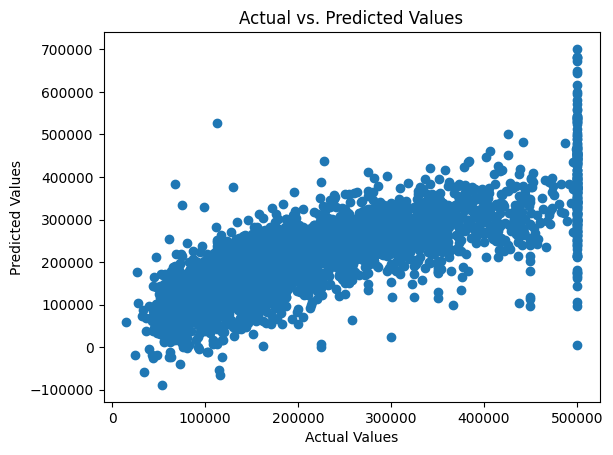

In [ ]:
plt.scatter(y_test, predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()  #scatter-plot chart

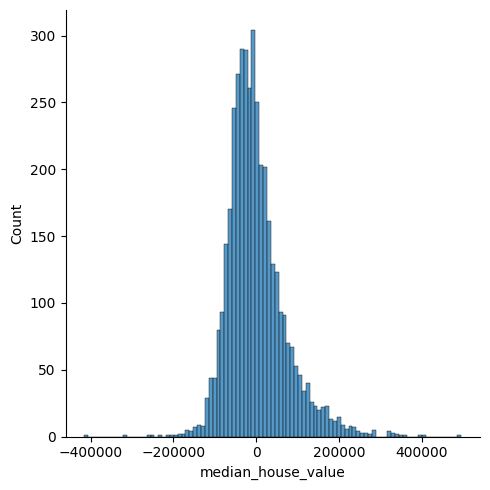

In [ ]:
sns.displot(y_test-predict) #dist-plot chart